# Loss of Bee Colonies
## A review of information taken from the 2020 USDA survey 

## Problem Statement
### Honey bees are a vital part of our worldwide food chain as one of the main pollinators of fruits and vegetables.  This review of the survey data collected by the USDA in 2020 attempts to outline the connections between various problems facing honeybee columns and the urgent problem of colony collapse disorder (CCD).  

## Proposed Solution
### We originally hypothesized that we would establish evidence of the relationship between pesticide use and CCD, and a compelling case could be made to discontinue the use of pesticides where feasible.  While pesticides are certainly a contributor to colony collapse disorder, it is evident with further review that the biggest problem facing honey bees are varroa mites, and that effective control and elimination of varroa mites must be a priority to have healthy bee colonies

## Value
### The loss of honey bees may lead to large scale food shortages. It is vital to convince both individuals and governmental agencies that resources must be put in place to foster honey bee health, including limiting use of pesticides, further research and sharing of information on the control of pests, and particularly control and elimination of varroa mites.

## Final Thoughts and Next Steps
### There are a number of contributors to CCD. While governmental agencies and bee farmers must take steps to address the problems of mites, pests, and disease, the data also shows that a very large amount of bee colonies in each state are affected by pesticides, with thousands showing affects.  These compelling observations make a strong case for individual limits on the use of household pesticides in order to save the bees.

#### Import the required modules 

In [1]:
import requests
import numpy as np
import pandas as pd
import time
from pprint import pprint
from matplotlib import pyplot as plt
from scipy import stats

#### Extract the required data from the usda website using the parameters of honey bees, survey format and state level information.  Import in JSON format.

In [ ]:
apikey = "15B191E7-B8C5-3AF1-9E28-97FD910F9119"
usda_url ="http://quickstats.nass.usda.gov/api/api_GET/?key=15B191E7-B8C5-3AF1-9E28-97FD910F9119&source_desc=SURVEY&commodity_desc=HONEY&agg_level_desc=STATE&param=short_desc"
usda_data= requests.get(usda_url).json()
usda_data

#### Formatted the resulting dictionary into a list and put it into DataFrame format. 

In [ ]:
new_usda_list=usda_data['data']
usda_df=pd.DataFrame(new_usda_list)
usda_df

#### Extracted only the relevant eight columns from the full DataFrame.

In [ ]:
usda_mod_df=usda_df[['reference_period_desc', 'source_desc', 'location_desc', 'sector_desc', 'year', 'Value', 'short_desc', 'statisticcat_desc']]
usda_mod_df

#### Created a DataFrame with only the information on honey bee colonies lost to colony collapse disorder (CCD).  As the original column 'Value' was in string format, we have changed it to float format for use in calculations below.

In [ ]:
#Extracted data with CCD for 2020 year (90 rows, 8 columns)
usda_collapse_df = usda_mod_df[usda_mod_df['short_desc'].str.contains("COLONY COLLAPSE DISORDER")]
usda_collapse_2020 = usda_collapse_df[usda_collapse_df['year']==2020]
#Removed "," from value columns
usda_collapse_2020['Value']=usda_collapse_2020['Value'].str.replace(',','')
#converted value column in CCD 2020 from str to float
usda_collapse_2020['Value'] = usda_collapse_2020['Value'].astype(float)
usda_collapse_2020

#### Created a DataFrame with only the information on honey bee colonies affected by pesticides. As the original column 'Value' was in string format, we have changed it to float format for use in calculations below.

In [ ]:
#Extracted data with pesticides for 2020 year (92 rows, 8 columns)
usda_pesticide_df = usda_mod_df[usda_mod_df['short_desc'].str.contains("AFFECTED BY PESTICIDES")]
usda_pesticide_2020 = usda_pesticide_df[usda_pesticide_df['year']==2020]
#converted value column from string to float
usda_pesticide_2020['Value']=pd.to_numeric(usda_pesticide_2020['Value'], errors='coerce')
usda_pesticide_2020

#### Created a DataFrame with only the information on honey bee colonies affected by pesticides. As the original column 'Value' was in string format, we have changed it to float format for use in calculations below.¶

In [ ]:
#Extracted data with inventory for 2020 year (92 rows, 8 columns)
usda_inventory_df = usda_mod_df[usda_mod_df['short_desc'].str.contains("INVENTORY, MAX,")]
usda_inventory_2020 = usda_inventory_df[usda_inventory_df['year']==2020]
#Renamed value column in inventory dataframe to inventory_value. Inplace=true changes the original dataframe
usda_inventory_2020.rename(columns={'Value':'inventory_value'},inplace=True)
usda_inventory_2020

#### Created a merged DataFrame containing both the pesticide and inventory value information for each survey.

In [9]:
inv_pest=pd.merge(usda_inventory_2020,usda_pesticide_2020,how='outer',on=['reference_period_desc','location_desc'])

#### Converted the 'inventory_value' column to a float for use in calculations

In [ ]:
#Replaced "," with '' in inv_pest['inventory_value'] column. 
inv_pest['inventory_value']=inv_pest['inventory_value'].str.replace(',','')
inv_pest['inventory_value']
#converted to float to make sure all the values are on float datatype. 
inv_pest['inventory_value']=inv_pest['inventory_value'].apply(lambda x: float(x))
inv_pest

#### Changed the name of the 'Value' column in the collapse dataframe to reflect 'value_ccd' and merged with the inv_pest dataframe to create one dataframe containing all relevant values per survey.

In [ ]:
#Renamed the column 'Value' to 'value_ccd' in order to be able to merge this df into the one with the inventory and pesticide numbers
usda_collapse_2020_new=usda_collapse_2020.rename(columns={'Value': 'value_ccd' })
#Merge to get all value data in one place and grouped by state and time period
usda_total=pd.merge(inv_pest,usda_collapse_2020_new,how='outer',on=['reference_period_desc','location_desc'])
usda_total

#### Calculated the percentage of colonies affected by CCD

In [ ]:
#Calculated the percentage of colonies lost to CCD
ccd_perc=round((usda_total['value_ccd']/usda_total['inventory_value'])*100, 2)
ccd_perc

#### Created a final survey level dataframe comparing percentages of colonies lost to CCD vs colonies affected by pesticides

In [ ]:
#Created a copy of df containing only percent of colonies affected by pesticides
usda_total_comp=usda_total[['location_desc', 'reference_period_desc', 'Value']]
usda_total_compare=usda_total_comp.copy()
#added the percentage lost to colony collapse
usda_total_compare['ccd_perc']=ccd_perc
#Changed column names to appropriately reflect the values
usda_total_compare.rename(columns={'Value': '%_Colonies_Affected_by_Pesticides', 'ccd_perc': "%_Colonies_Lost_to_Colony_Collapse_Disorder"}, inplace=True)
#Replace NaN values in "OTHER STATES" with 0
usda_total_compare["%_Colonies_Lost_to_Colony_Collapse_Disorder"] = usda_total_compare["%_Colonies_Lost_to_Colony_Collapse_Disorder"].fillna(0)
usda_total_compare['%_Colonies_Affected_by_Pesticides'] = usda_total_compare["%_Colonies_Affected_by_Pesticides"].fillna(0)
usda_total_compare

#### Grouped the data at the state level

In [ ]:
grp_usda_total_compare=usda_total_compare.groupby(usda_total_compare['location_desc']).sum()
grp_usda_total_compare

#### Broke the data down into two equal groups so that they can be easily readable in scatter graphs

In [ ]:
grp1_usda_total_compare=grp_usda_total_compare.head(23)
grp1_usda_total_compare
grp2_usda_total_compare=grp_usda_total_compare.tail(23)
grp2_usda_total_compare

#### More colonies appear to be affected by pesticides than lost to colony collapse disorder.

In [ ]:
#Step histogram of both colony collapse disorder and pesticides percentages
fig, ax = plt.subplots()
ax.hist(grp_usda_total_compare['%_Colonies_Lost_to_Colony_Collapse_Disorder'], label="Colony Collapse Disorder", color='red', histtype="step")
ax.hist(grp_usda_total_compare['%_Colonies_Affected_by_Pesticides'], label="Affected By Pesticides", color='blue', histtype="step")
ax.set_title("Loss of Bee Colonies with Colony Collapse Disorder and Pesticides", pad=20)
ax.set_xlabel("Number of Colonies Affected")
ax.set_ylabel("Number of States")
ax.legend()
plt.savefig("bee_hist")
plt.show()


#### A view of survey results at the individual state level. 

<ipython-input-17-b046bb6af75a>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(grp1_usda_total_compare.index, rotation=90)


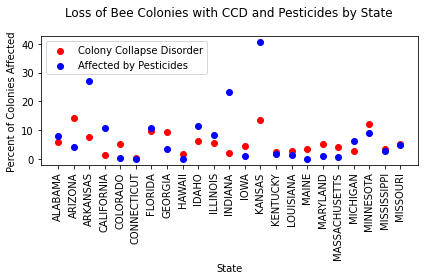

In [17]:
#Created a scatterplot to reflect percentages of colony collapse disorder and colonies affected by pesticides
fig, ax = plt.subplots()
ax.scatter(grp1_usda_total_compare.index, grp1_usda_total_compare['%_Colonies_Lost_to_Colony_Collapse_Disorder'], color="red", label="Colony Collapse Disorder")
ax.scatter(grp1_usda_total_compare.index, grp1_usda_total_compare['%_Colonies_Affected_by_Pesticides'], color="blue", label="Affected by Pesticides")
ax.legend()
ax.set_title("Loss of Bee Colonies with CCD and Pesticides by State", pad=20)
ax.set_xticklabels(grp1_usda_total_compare.index, rotation=90)
ax.set_xlabel("State")
ax.set_ylabel("Percent of Colonies Affected")
plt.tight_layout()
plt.savefig("grp1_scatter")
plt.show()

<ipython-input-18-ff91cd7e9ff8>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(grp2_usda_total_compare.index, rotation=90)


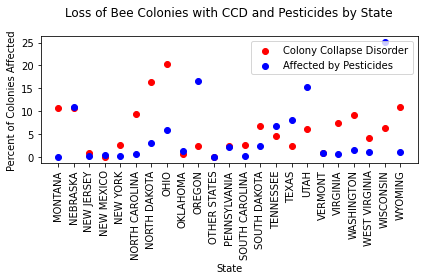

In [18]:
#Created a scatterplot to reflect percentages of colony collapse disorder and colonies affected by pesticides
fig, ax = plt.subplots()
ax.scatter(grp2_usda_total_compare.index, grp2_usda_total_compare['%_Colonies_Lost_to_Colony_Collapse_Disorder'], color="red", label="Colony Collapse Disorder")
ax.scatter(grp2_usda_total_compare.index, grp2_usda_total_compare['%_Colonies_Affected_by_Pesticides'], color="blue", label="Affected by Pesticides")
ax.legend()
#Pad is spacing between title and plot
ax.set_title("Loss of Bee Colonies with CCD and Pesticides by State", pad=20)
ax.set_xticklabels(grp2_usda_total_compare.index, rotation=90)
ax.set_xlabel("State")
ax.set_ylabel("Percent of Colonies Affected")
plt.tight_layout()
plt.savefig("grp2_scatter")
plt.show()

#### A calculation of the correlation coefficient shows little correlation.

In [ ]:
np.corrcoef(usda_total_compare['%_Colonies_Affected_by_Pesticides'], usda_total_compare['%_Colonies_Lost_to_Colony_Collapse_Disorder'] )

In [ ]:
usda_total_compare.describe()

### Gathered a list of the types of information included in the honey bee survey

In [ ]:
print(usda_df['short_desc'].unique())

### Created a dataframe which included all categories investigated for their effects on honey bees for the year 2020

In [ ]:
#Extracted data with effects for 2020 year (92 rows, 8 columns)
usda_ab_df = usda_mod_df[usda_mod_df['short_desc'].str.contains("AFFECTED BY")]
usda_ab_2020 = usda_ab_df[usda_ab_df['year']==2020]
#converted value column from string to float
usda_ab_2020['Value']=pd.to_numeric(usda_ab_2020['Value'], errors='coerce')
usda_ab_2020

### Dataframe which shows the full percentages for each category for the year at the state level

In [ ]:
grp_usda_ab=usda_ab_2020.groupby(['location_desc','short_desc', 'year']).sum()
grp_usda_ab

### Pulled each category for the year separately so that information can be merged later into a dataframe containing all information aggregated.

#### Honey Bee Colonies Affected By Disease

In [ ]:
#Extracted data with disease for 2020 year (92 rows, 8 columns)
usda_disease_df = usda_ab_2020[usda_ab_2020['short_desc'].str.contains('HONEY, BEE COLONIES, AFFECTED BY DISEASE')]
#converted value column from string to float
usda_disease_df['Value']=pd.to_numeric(usda_disease_df['Value'], errors='coerce')
usda_disease_df=usda_disease_df.fillna(0)
usda_disease_df.rename(columns={'Value': '%_Colonies_Affected_by_Disease'}, inplace=True)
usda_disease_df

#### Honey Bee Colonies Affected By Pests

In [ ]:
#Extracted data with pests for 2020 year (92 rows, 8 columns)
usda_pests_df = usda_ab_2020[usda_ab_2020['short_desc'].str.contains('HONEY, BEE COLONIES, AFFECTED BY PESTS')]
#converted value column from string to float
usda_pests_df['Value']=pd.to_numeric(usda_pests_df['Value'], errors='coerce')
usda_pests_df=usda_pests_df.fillna(0)
usda_pests_df.rename(columns={'Value': '%_Colonies_Affected_by_Pests'}, inplace=True)
usda_pests_df

#### Honey Bee Colonies Affected By Other Causes

In [ ]:
#Extracted data with other causes for 2020 year (92 rows, 8 columns)
usda_other_df = usda_ab_2020[usda_ab_2020['short_desc'].str.contains('AFFECTED BY OTHER CAUSES')]
#converted value column from string to float
usda_other_df['Value']=pd.to_numeric(usda_other_df['Value'], errors='coerce')
usda_other_df=usda_other_df.fillna(0)
usda_other_df.rename(columns={'Value': '%_Colonies_Affected_by_Other_Causes'}, inplace=True)
usda_other_df

#### Honey Bee Colonies Affected By Unknown Causes

In [ ]:
#Extracted data with unknown causes for 2020 year (92 rows, 8 columns)
usda_unknown_df = usda_ab_2020[usda_ab_2020['short_desc'].str.contains('AFFECTED BY UNKNOWN CAUSES')]
#converted value column from string to float
usda_unknown_df['Value']=pd.to_numeric(usda_unknown_df['Value'], errors='coerce')
usda_unknown_df=usda_unknown_df.fillna(0)
usda_unknown_df.rename(columns={'Value': '%_Colonies_Affected_by_Unknown_Causes'}, inplace=True)
usda_unknown_df

#### Honey Bee Colonies Affected By Varroa Mites

In [ ]:
#Extracted data with varroa mites for 2020 year (92 rows, 8 columns)
usda_mites_df = usda_ab_2020[usda_ab_2020['short_desc'].str.contains('AFFECTED BY VARROA MITES')]
#converted value column from string to float
usda_mites_df['Value']=pd.to_numeric(usda_mites_df['Value'], errors='coerce')
usda_mites_df=usda_mites_df.fillna(0)
usda_mites_df.rename(columns={'Value': '%_Colonies_Affected_by_Varroa_Mites'}, inplace=True)
usda_mites_df

### Joined the dataframes so that all of the values for each type of category are contained within the appropriate row for the state and date of the survey

In [ ]:
#Merge to get all data in one place
usda_total1=pd.merge(usda_total, usda_disease_df, how='outer',on=['reference_period_desc','location_desc'])
usda_total1['%_Colonies_Lost_to_Colony_Collapse_Disorder']=ccd_perc
usda_total2=pd.merge(usda_total1, usda_pests_df, how='outer',on=['reference_period_desc','location_desc'])
usda_total3=pd.merge(usda_total2, usda_other_df, how='outer',on=['reference_period_desc','location_desc'])
usda_total4=pd.merge(usda_total3, usda_unknown_df, how='outer',on=['reference_period_desc','location_desc'])
usda_total5=pd.merge(usda_total4, usda_mites_df, how='outer',on=['reference_period_desc','location_desc'])
usda_total5=usda_total5.rename(columns={'Value': '%_Colonies_Affected_by_Pesticides'})
usda_total6=pd.merge(usda_total5, inv_pest, how='outer',on=['reference_period_desc','location_desc'])
usda_total6

### Created a dataframe with only the relevant columns of loaction, date, and the categories of problems documented in the colony surveys

In [ ]:
usda_affects_perc=usda_total5[['location_desc', 'reference_period_desc', '%_Colonies_Lost_to_Colony_Collapse_Disorder', '%_Colonies_Affected_by_Pesticides', '%_Colonies_Affected_by_Disease', '%_Colonies_Affected_by_Pests', '%_Colonies_Affected_by_Other_Causes', '%_Colonies_Affected_by_Unknown_Causes','%_Colonies_Affected_by_Varroa_Mites']]
usda_affects_perc=usda_affects_perc.fillna(0)
usda_affects_perc

### Grouped the above dataframe to consolidate information at the state level for the entire year

In [ ]:
grp_usda_affects_perc=usda_affects_perc.groupby(usda_affects_perc['location_desc']).sum()
grp_usda_affects_perc

### Broke the grouped data frame up into two groups of 23 each to be able to visualize data in a managable format

In [ ]:
grp1_usda_affects_perc=grp_usda_affects_perc.head(23)
grp1_usda_affects_perc
grp2_usda_affects_perc=grp_usda_affects_perc.tail(23)
grp2_usda_affects_perc

### Scatterplots showing the affecting categories by smaller group. 

#### Group 1

<ipython-input-61-380e766a01b9>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(grp1_usda_affects_perc.index, rotation=90)


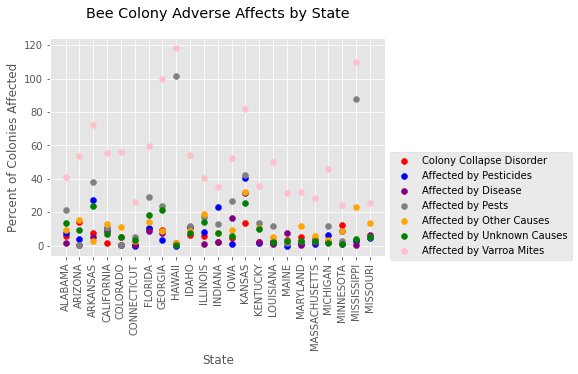

In [61]:
#Created a scatterplot to reflect percentages of colony collapse disorder and various adverse affects
fig, ax = plt.subplots()
ax.scatter(grp1_usda_affects_perc.index, grp1_usda_affects_perc['%_Colonies_Lost_to_Colony_Collapse_Disorder'], color="red", label="Colony Collapse Disorder")
ax.scatter(grp1_usda_affects_perc.index, grp1_usda_affects_perc['%_Colonies_Affected_by_Pesticides'], color="blue", label="Affected by Pesticides")
ax.scatter(grp1_usda_affects_perc.index, grp1_usda_affects_perc['%_Colonies_Affected_by_Disease'], color="purple", label="Affected by Disease")
ax.scatter(grp1_usda_affects_perc.index, grp1_usda_affects_perc['%_Colonies_Affected_by_Pests'], color="grey", label="Affected by Pests")
ax.scatter(grp1_usda_affects_perc.index, grp1_usda_affects_perc['%_Colonies_Affected_by_Other_Causes'], color="orange", label="Affected by Other Causes")
ax.scatter(grp1_usda_affects_perc.index, grp1_usda_affects_perc['%_Colonies_Affected_by_Unknown_Causes'], color="green", label="Affected by Unknown Causes")
ax.scatter(grp1_usda_affects_perc.index, grp1_usda_affects_perc['%_Colonies_Affected_by_Varroa_Mites'], color="pink", label="Affected by Varroa Mites")
#Pad is spacing between title and plot
ax.set_title("Bee Colony Adverse Affects by State", pad=20)
ax.set_xticklabels(grp1_usda_affects_perc.index, rotation=90)
ax.set_xlabel("State")
ax.set_ylabel("Percent of Colonies Affected")
ax.legend(loc='best', bbox_to_anchor=(1, 0.5))
plt.savefig("grp1_adverse_scatter", bbox_inches='tight')
plt.show()

#### Group 2

<ipython-input-62-f55c878093ac>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(grp2_usda_affects_perc.index, rotation=90)


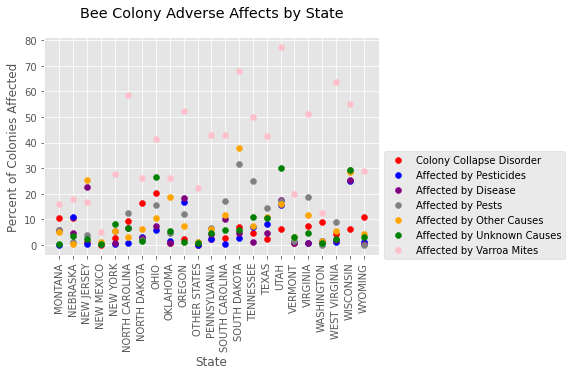

In [62]:
#Created a scatterplot to reflect percentages of colony collapse disorder and various adverse affects
fig, ax = plt.subplots()
ax.scatter(grp2_usda_affects_perc.index, grp2_usda_affects_perc['%_Colonies_Lost_to_Colony_Collapse_Disorder'], color="red", label="Colony Collapse Disorder")
ax.scatter(grp2_usda_affects_perc.index, grp2_usda_affects_perc['%_Colonies_Affected_by_Pesticides'], color="blue", label="Affected by Pesticides")
ax.scatter(grp2_usda_affects_perc.index, grp2_usda_affects_perc['%_Colonies_Affected_by_Disease'], color="purple", label="Affected by Disease")
ax.scatter(grp2_usda_affects_perc.index, grp2_usda_affects_perc['%_Colonies_Affected_by_Pests'], color="grey", label="Affected by Pests")
ax.scatter(grp2_usda_affects_perc.index, grp2_usda_affects_perc['%_Colonies_Affected_by_Other_Causes'], color="orange", label="Affected by Other Causes")
ax.scatter(grp2_usda_affects_perc.index, grp2_usda_affects_perc['%_Colonies_Affected_by_Unknown_Causes'], color="green", label="Affected by Unknown Causes")
ax.scatter(grp2_usda_affects_perc.index, grp2_usda_affects_perc['%_Colonies_Affected_by_Varroa_Mites'], color="pink", label="Affected by Varroa Mites")
#Pad is spacing between title and plot
ax.set_title("Bee Colony Adverse Affects by State", pad=20)
ax.set_xticklabels(grp2_usda_affects_perc.index, rotation=90)
ax.set_xlabel("State")
ax.set_ylabel("Percent of Colonies Affected")
ax.legend(loc='best', bbox_to_anchor=(1, 0.5))
plt.savefig("grp2_adverse_scatter", bbox_inches='tight')
plt.show()

### Bar plots by group showing adverse effects layered

#### Group 1

<ipython-input-63-d006d03c7213>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(grp1_usda_affects_perc.index, rotation=90)


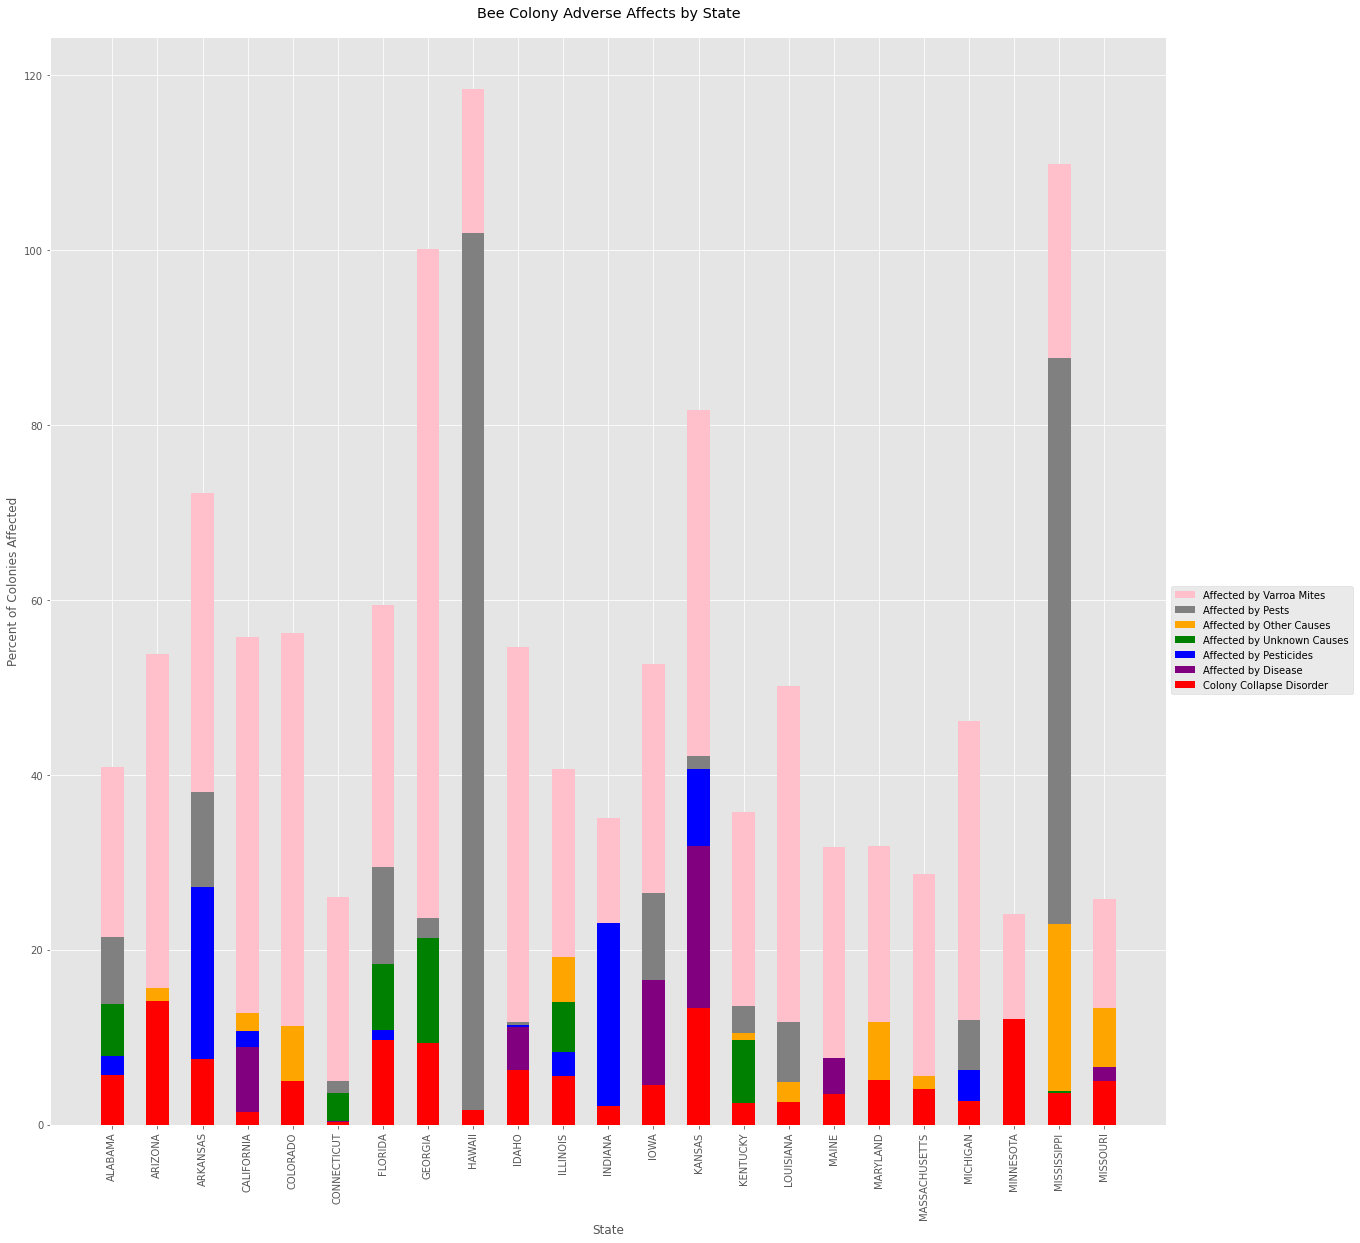

In [63]:
#Created a barplot to reflect percentages of colony collapse disorder and various adverse affects
fsize=(20,20)
fig, ax = plt.subplots(figsize=fsize)
ax.bar(grp1_usda_affects_perc.index, grp1_usda_affects_perc['%_Colonies_Affected_by_Varroa_Mites'], width=0.5,color="pink", label="Affected by Varroa Mites")
ax.bar(grp1_usda_affects_perc.index, grp1_usda_affects_perc['%_Colonies_Affected_by_Pests'],width=0.5, color="grey", label="Affected by Pests")
ax.bar(grp1_usda_affects_perc.index, grp1_usda_affects_perc['%_Colonies_Affected_by_Other_Causes'], width=0.5,color="orange", label="Affected by Other Causes")
ax.bar(grp1_usda_affects_perc.index, grp1_usda_affects_perc['%_Colonies_Affected_by_Unknown_Causes'], width=0.5,color="green", label="Affected by Unknown Causes")
ax.bar(grp1_usda_affects_perc.index, grp1_usda_affects_perc['%_Colonies_Affected_by_Pesticides'], width=0.5,color="blue", label="Affected by Pesticides")
ax.bar(grp1_usda_affects_perc.index, grp1_usda_affects_perc['%_Colonies_Affected_by_Disease'],width=0.5, color="purple", label="Affected by Disease")
ax.bar(grp1_usda_affects_perc.index, grp1_usda_affects_perc['%_Colonies_Lost_to_Colony_Collapse_Disorder'], width=0.5, color="red", label="Colony Collapse Disorder")
#Pad is spacing between title and plot
ax.set_title("Bee Colony Adverse Affects by State", pad=20)
ax.set_xticklabels(grp1_usda_affects_perc.index, rotation=90)
ax.set_xlabel("State")
ax.set_ylabel("Percent of Colonies Affected")
ax.legend(loc='best', bbox_to_anchor=(1, 0.5))
plt.savefig("grp1_adverse_bar", bbox_inches='tight')
plt.show()

#### Group 2

<ipython-input-64-bf7093bcf95d>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(grp2_usda_affects_perc.index, rotation=90)


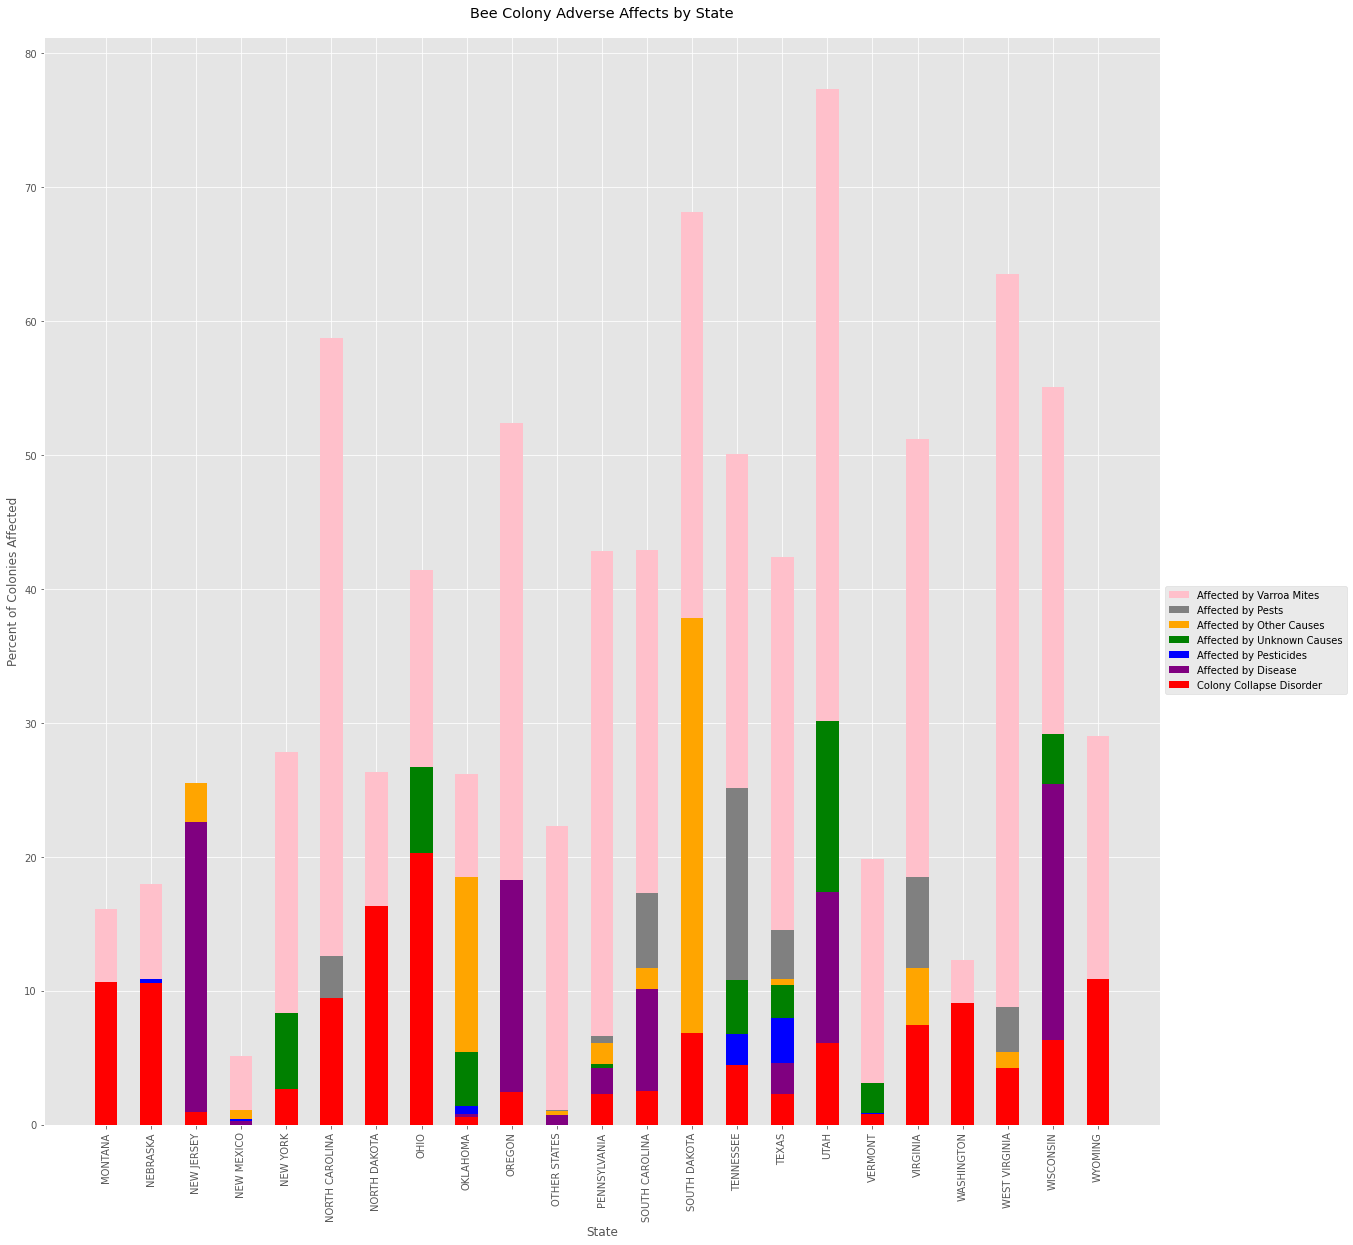

In [64]:
#Created a barplot to reflect percentages of colony collapse disorder and various adverse affects
fsize=(20,20)
fig, ax = plt.subplots(figsize=fsize)
ax.bar(grp2_usda_affects_perc.index, grp2_usda_affects_perc['%_Colonies_Affected_by_Varroa_Mites'], width=0.5,color="pink", label="Affected by Varroa Mites")
ax.bar(grp2_usda_affects_perc.index, grp2_usda_affects_perc['%_Colonies_Affected_by_Pests'],width=0.5, color="grey", label="Affected by Pests")
ax.bar(grp2_usda_affects_perc.index, grp2_usda_affects_perc['%_Colonies_Affected_by_Other_Causes'], width=0.5,color="orange", label="Affected by Other Causes")
ax.bar(grp2_usda_affects_perc.index, grp2_usda_affects_perc['%_Colonies_Affected_by_Unknown_Causes'], width=0.5,color="green", label="Affected by Unknown Causes")
ax.bar(grp2_usda_affects_perc.index, grp2_usda_affects_perc['%_Colonies_Affected_by_Pesticides'], width=0.5,color="blue", label="Affected by Pesticides")
ax.bar(grp2_usda_affects_perc.index, grp2_usda_affects_perc['%_Colonies_Affected_by_Disease'],width=0.5, color="purple", label="Affected by Disease")
ax.bar(grp2_usda_affects_perc.index, grp2_usda_affects_perc['%_Colonies_Lost_to_Colony_Collapse_Disorder'], width=0.5, color="red", label="Colony Collapse Disorder")
#Pad is spacing between title and plot
ax.set_title("Bee Colony Adverse Affects by State", pad=20)
ax.set_xticklabels(grp2_usda_affects_perc.index, rotation=90)
ax.set_xlabel("State")
ax.set_ylabel("Percent of Colonies Affected")
ax.legend(loc='best', bbox_to_anchor=(1, 0.5))
plt.savefig("grp2_adverse_bar", bbox_inches='tight')
plt.show()

### Created variables of the sum of each categories percentages for comparison and places them in a dataframe

In [37]:
ccd = grp1_usda_affects_perc['%_Colonies_Lost_to_Colony_Collapse_Disorder'].sum()
pesticides=grp1_usda_affects_perc['%_Colonies_Affected_by_Pesticides'].sum()
disease=grp1_usda_affects_perc['%_Colonies_Affected_by_Disease'].sum()
pests = grp1_usda_affects_perc['%_Colonies_Affected_by_Pests'].sum()
other_causes = grp1_usda_affects_perc['%_Colonies_Affected_by_Other_Causes'].sum()
unknown_causes = grp1_usda_affects_perc['%_Colonies_Affected_by_Unknown_Causes'].sum()
varroa_mites = grp1_usda_affects_perc['%_Colonies_Affected_by_Varroa_Mites'].sum()

In [56]:
df_perc_sum = pd.DataFrame({'%_sum_ccd': ccd, 
                           '%_sum_pesticides': pesticides,
                           '%_sum_disease': disease, 
                           '%_sum_pests': pests,
                           '%_sum_other_causes': other_causes,
                           '%_sum_unknown_causes': unknown_causes,
                           '%_sum_varroa_mites': varroa_mites}, index=[0])

df_perc_sum 

,%_sum_ccd,%_sum_pesticides,%_sum_disease,%_sum_pests,%_sum_other_causes,%_sum_unknown_causes,%_sum_varroa_mites
0,127.35,176.0,119.5,480.0,239.3,195.3,1231.4


### Graph of the sum of percentages by categories of adverse effects

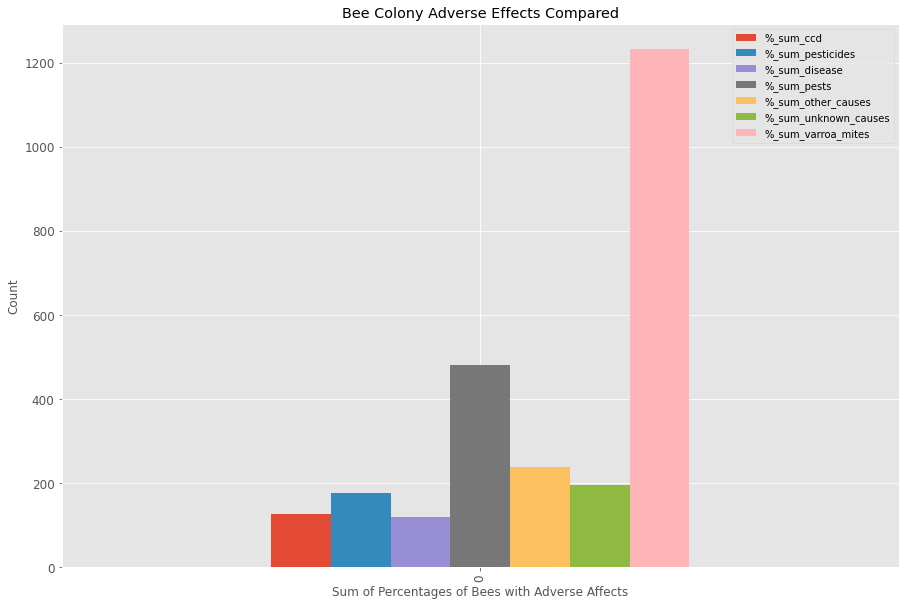

In [65]:
plt.style.use('ggplot')
ax = df_perc_sum[['%_sum_ccd','%_sum_pesticides','%_sum_disease', '%_sum_pests', '%_sum_other_causes', 
                                  '%_sum_unknown_causes', '%_sum_varroa_mites']].plot(kind='bar', 
                    title ="Bee Colony Adverse Effects Compared",figsize=(15,10),legend=True, fontsize=12)
ax.set_xlabel("Sum of Percentages of Bees with Adverse Affects",fontsize=12)
ax.set_ylabel("Count",fontsize=12)
plt.savefig('Sum_perc_comp', bbox_inches='tight')
plt.show()